### Task

Use the Titanic dataset to build a model that predicts whether a passenger on the Titanic survived or not. This is a classic beginner project with readily available data.

The dataset typically used for this project contains information about individual passengers, such as their age, gender, ticket class, fare, cabin, and whether or not they survived.

### 1. Import Necessary Libraries and Load Data

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('data/Titanic-Dataset.csv')

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### 2. Data Exploration & Cleaning

In [4]:
# Display missing values in the dataset
missing_values = df.isnull().sum()
missing_values

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [5]:
# Fill missing Age values with the median age
df['Age'].fillna(df['Age'].median(), inplace=True)

C:\Users\DAVE\AppData\Local\Temp\ipykernel_11516\1747040645.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)


In [6]:
# Fill missing Embarked values with the most common embarkation port
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

C:\Users\DAVE\AppData\Local\Temp\ipykernel_11516\1020559094.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)


In [7]:
# Drop Cabin column since it has too many missing values
df.drop(columns=['Cabin'], inplace=True)

In [8]:
# Display missing values in the dataset
missing_values = df.isnull().sum()
missing_values

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

### 3. Feature Engineering

#### 3.1. Drop unimportant columns

In [9]:
# Drop unnecessary columns
df.drop(columns=['PassengerId', 'Name', 'Ticket'], inplace=True)

#### 3.2. Convert categorical variables

In [10]:
# Convert categorical variables into numerical values
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})
df['Embarked'] = df['Embarked'].map({'C': 0, 'Q': 1, 'S': 2})

#### 3.3. Create new features

In [11]:
# Create a new feature: Family Size (SibSp + Parch + 1)
df["FamilySize"] = df["SibSp"] + df["Parch"] + 1

In [12]:
# Drop SibSp and Parch as they are now represented in FamilySize
df.drop(columns=["SibSp", "Parch"], inplace=True)

In [13]:
df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,FamilySize
0,0,3,0,22.0,7.2500,2,2
1,1,1,1,38.0,71.2833,0,2
2,1,3,1,26.0,7.9250,2,1
3,1,1,1,35.0,53.1000,2,2
4,0,3,0,35.0,8.0500,2,1


### 4. Data Splitting

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report

In [15]:
# Split data into features and target variable
X = df.drop(columns=['Survived'])
y = df['Survived']

In [16]:
# Split into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### 5. Model Selection

In [17]:
# Train three different models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
}

In [18]:
# Train and evaluate each model
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    results[name] = accuracy

results

c:\Users\DAVE\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [21:12:55] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


{'Logistic Regression': 0.8044692737430168,
 'Random Forest': 0.8156424581005587,
 'XGBoost': 0.7821229050279329}

**Model Performance:**

Logistic Regression Accuracy: 80.4%

Random Forest Accuracy: 81.6%

XGBoost Accuracy: 78.2%

Lets Proceed with Random Forest

In [19]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model

RandomForestClassifier(random_state=42)

In [21]:
# Fit Model
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

### 6. Feature Importance Analysis

In [22]:
# Get feature importance from Random Forest model
feature_importance = rf_model.feature_importances_

In [23]:
# Create DataFrame for visualization
importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importance})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

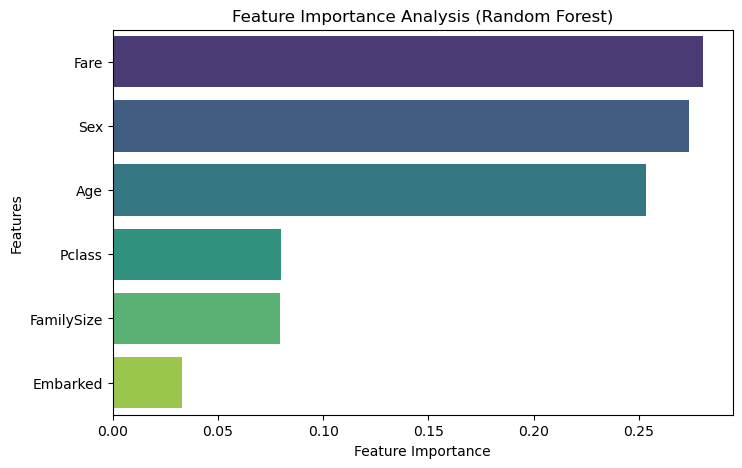

In [24]:
# Plot feature importance
plt.figure(figsize=(8,5))
sns.barplot(x=importance_df['Importance'], y=importance_df['Feature'], palette='viridis')
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.title("Feature Importance Analysis (Random Forest)")
plt.show()

**Fare has high importance →** Higher fares correlate with better survival rates (likely first-class passengers).

**Sex (Gender) →** Being female significantly increased survival chances.

**Age →** Younger passengers had slightly better survival chances.

**Pclass →** Higher-class passengers had better survival rates.

**FamilySize and embark** → Having family members aboard and place where embarked had minimal influence.

### 7. Hyperparameter Tuning for Random Forest

In [25]:
from sklearn.model_selection import GridSearchCV

In [26]:
# Define hyperparameter grid for Random Forest
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [27]:
# Perform Grid Search for hyperparameter tuning
grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=1)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 108 candidates, totalling 540 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [3, 5, 7, None],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             scoring='accuracy', verbose=1)

In [28]:
# Best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

best_params, best_score


({'max_depth': 5,
  'min_samples_leaf': 1,
  'min_samples_split': 2,
  'n_estimators': 200},
 0.8384221412390426)

In [29]:
# Train final Random Forest model with best parameters
best_rf_model = RandomForestClassifier(**best_params, random_state=42)
best_rf_model.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, n_estimators=200, random_state=42)

In [30]:
# Evaluate best model
best_rf_predictions = best_rf_model.predict(X_test)
best_rf_accuracy = accuracy_score(y_test, best_rf_predictions)

**Save Model**

In [31]:
import joblib

In [33]:
# Save best model
best_model_path = "model/best_random_forest_model.pkl"
joblib.dump(best_rf_model, best_model_path)

['model/best_random_forest_model.pkl']